In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime as dt

In [3]:
!ls

Data Cleaning.ipynb     Zip_Codes               homemade_regression.py
Questions and EDA.ipynb cleaned_data.csv        kc_house_data.csv


In [4]:
raw_df = pd.read_csv('kc_house_data.csv')

In [5]:
raw_df.shape

(21597, 21)

In [6]:
raw_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
raw_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
raw_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
zipcode_df = raw_df.groupby('zipcode').median()
zipcode_df.price.head(25)

zipcode
98001     260000.0
98002     235000.0
98003     267475.0
98004    1150000.0
98005     765475.0
98006     760184.5
98007     555000.0
98008     545000.0
98010     359999.5
98011     470000.0
98014     415000.0
98019     401250.0
98022     280000.0
98023     268450.0
98024     462500.0
98027     570500.0
98028     445000.0
98029     575000.0
98030     282255.0
98031     288000.0
98032     249000.0
98033     678350.0
98034     445950.0
98038     342000.0
98039    1895000.0
Name: price, dtype: float64

In [11]:
raw_df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [12]:
raw_df.yr_renovated.isna().sum()

3842

In [13]:
renovated_df = raw_df[raw_df['yr_renovated']>0]

In [14]:
renovated_df = renovated_df.dropna(subset=['yr_renovated'], axis=0)

In [15]:
renovated_df.shape

(744, 21)

In [13]:
renovated_df['date'] = renovated_df['date'].map(lambda x: dt.datetime.strptime(str(x),'%m/%d/%Y').strftime('%d/%m/%Y'))

years_sold = [float(x[6:11]) for x in renovated_df.date]
years_renovated = [x for x in renovated_df.yr_renovated]

sold_array = np.array(years_sold)
renovated_array = np.array(years_renovated)

years_ago = sold_array - renovated_array

renovated_df['renovated_year_ago'] = years_ago

In [14]:
renovated_df['renovated_year_ago'].value_counts()

0.0     68
1.0     37
8.0     34
10.0    29
11.0    27
15.0    23
7.0     21
12.0    21
14.0    21
31.0    20
25.0    20
9.0     19
24.0    19
5.0     18
26.0    18
13.0    16
6.0     16
16.0    16
20.0    15
28.0    15
29.0    15
23.0    14
21.0    14
22.0    13
2.0     13
4.0     13
17.0    12
19.0    12
32.0    11
27.0    10
        ..
45.0     5
51.0     4
33.0     4
41.0     4
40.0     4
38.0     4
59.0     4
58.0     3
69.0     3
56.0     3
52.0     3
42.0     3
36.0     3
47.0     3
74.0     2
43.0     2
70.0     2
54.0     2
39.0     2
49.0     2
55.0     2
48.0     1
65.0     1
57.0     1
60.0     1
53.0     1
64.0     1
66.0     1
80.0     1
61.0     1
Name: renovated_year_ago, Length: 70, dtype: int64

In [15]:
renovated_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_year_ago
1,6414100192,09/12/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,23.0
35,9547205180,13/06/2014,696000.0,3,2.50,2300,3060,1.5,0.0,0.0,...,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264,12.0
95,1483300570,08/09/2014,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,...,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045,23.0
103,2450000295,07/10/2014,1090000.0,3,2.50,2920,8113,2.0,0.0,0.0,...,2920,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113,4.0
125,4389200955,02/03/2015,1450000.0,4,2.75,2750,17789,1.5,0.0,0.0,...,1980,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275,23.0


In [58]:
print([x[6:11] for x in renovated_df.date.head(5)])

['2014', '2014', '2014', '2014', '2015']


In [17]:
raw_df.loc[raw_df['waterfront']== 1].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,145.000000,146.000000,146.000000,146.000000,146.000000,121.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.786207,3.541096,8.835616,2508.760274,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630
std,2.858045e+09,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.555105,0.743957,1.781233,1283.720489,27.118576,852.484732,60.599756,0.113744,0.123772,808.410448,23264.085993
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,5.000000,440.000000,1905.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000
25%,2.016369e+09,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,8.000000,1565.000000,1941.250000,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000
50%,3.692780e+09,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,9.000000,2200.000000,1959.500000,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000
75%,7.390450e+09,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,10.000000,3220.000000,1984.750000,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


<BarContainer object of 744 artists>

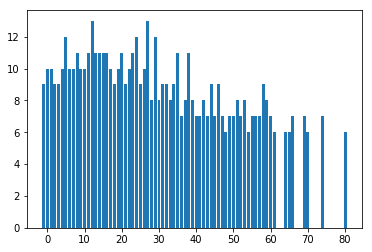

In [18]:
plt.bar(renovated_df['renovated_year_ago'], renovated_df['grade'])

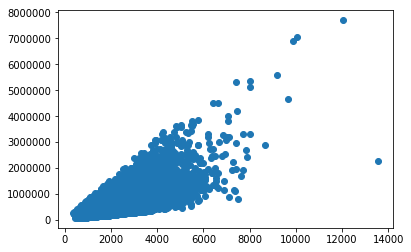

In [19]:
plt.scatter(raw_df['sqft_living'], raw_df['price'])

In [43]:
raw_df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [46]:
raw_df.loc[raw_df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [45]:
raw_df.drop(index=15856, inplace=True)

In [48]:
raw_df.duplicated().any()

False

In [53]:
raw_df['waterfront'] = raw_df['waterfront'].fillna(0)

In [57]:
raw_df.waterfront.isna().any()

False

In [64]:
raw_df.to_csv('cleaned_data.csv')

In [63]:
!ls

Module 1 Project Technical Document.ipynb
Zip_Codes
\cleaned_data.csv
kc_house_data.csv
